# My ANN

In [33]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [13]:
# Get the data, clean and scale
alldata = pd.read_csv('alldata.csv')

alldata.drop(columns = ['Unnamed: 0'], inplace = True)

X = alldata.iloc[: , 1:]
y = alldata.iloc[: , 0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state= 42, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state = 42, shuffle = True)

In [26]:
# Create the model
model1 = Sequential([
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(0.01),
    metrics = ['accuracy']
)

In [20]:
sum(y_train) / len(y_train)

0.5010985992859105

In [27]:
history = model1.fit(X_train,
                    y_train,
                    epochs=600,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/600
228/228 [==============================] - 0s 849us/step - loss: 0.5403 - accuracy: 0.7369 - val_loss: 0.5172 - val_accuracy: 0.7473
Epoch 2/600
228/228 [==============================] - 0s 599us/step - loss: 0.4746 - accuracy: 0.7656 - val_loss: 0.4527 - val_accuracy: 0.7714
Epoch 3/600
228/228 [==============================] - 0s 604us/step - loss: 0.4544 - accuracy: 0.7785 - val_loss: 0.4405 - val_accuracy: 0.7912
Epoch 4/600
228/228 [==============================] - 0s 606us/step - loss: 0.4407 - accuracy: 0.7841 - val_loss: 0.4455 - val_accuracy: 0.7835
Epoch 5/600
228/228 [==============================] - 0s 601us/step - loss: 0.4266 - accuracy: 0.7902 - val_loss: 0.4333 - val_accuracy: 0.7835
Epoch 6/600
228/228 [==============================] - 0s 604us/step - loss: 0.4291 - accuracy: 0.7849 - val_loss: 0.4679 - val_accuracy: 0.7824
Epoch 7/600
228/228 [==============================] - 0s 758us/step - loss: 0.4184 - accuracy: 0.7929 - val_loss: 0.4338 - val_ac

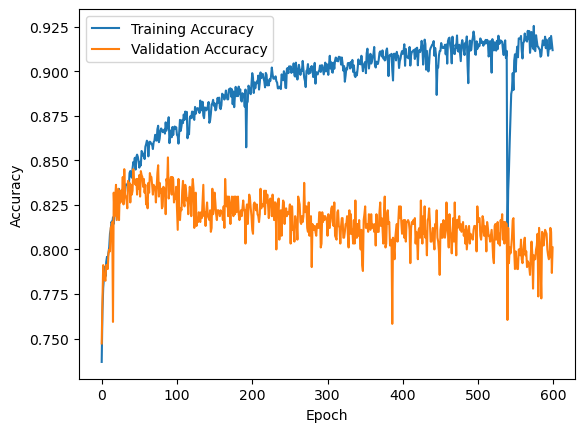

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Looks like the model is too big and is overfitting too quickly. Let's make a smaller model

In [38]:
model2 = Sequential([
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(0.01),
    metrics = ['accuracy']
)

# Train the model
history2 = model2.fit(X_train,
                    y_train,
                    epochs=600,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/600
228/228 [==============================] - 0s 790us/step - loss: 0.5305 - accuracy: 0.7346 - val_loss: 0.4992 - val_accuracy: 0.7681
Epoch 2/600
228/228 [==============================] - 0s 563us/step - loss: 0.4760 - accuracy: 0.7696 - val_loss: 0.5046 - val_accuracy: 0.7714
Epoch 3/600
228/228 [==============================] - 0s 561us/step - loss: 0.4631 - accuracy: 0.7784 - val_loss: 0.4726 - val_accuracy: 0.7747
Epoch 4/600
228/228 [==============================] - 0s 546us/step - loss: 0.4394 - accuracy: 0.7893 - val_loss: 0.4462 - val_accuracy: 0.7912
Epoch 5/600
228/228 [==============================] - 0s 550us/step - loss: 0.4321 - accuracy: 0.7867 - val_loss: 0.4704 - val_accuracy: 0.7626
Epoch 6/600
228/228 [==============================] - 0s 548us/step - loss: 0.4214 - accuracy: 0.7946 - val_loss: 0.4365 - val_accuracy: 0.7956
Epoch 7/600
228/228 [==============================] - 0s 549us/step - loss: 0.4152 - accuracy: 0.8014 - val_loss: 0.4272 - val_ac

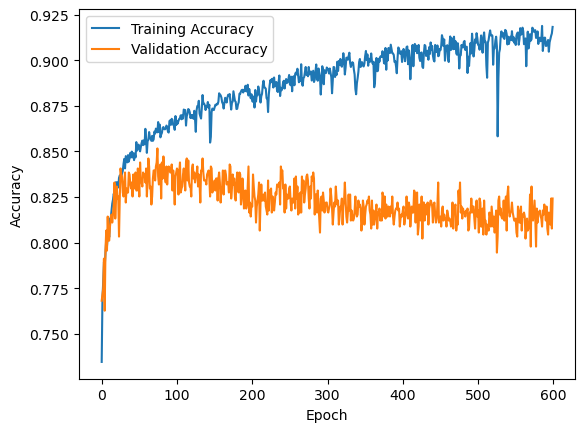

In [39]:
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Well it is overfitting. So let's try to make the model more complicated and add dropout layers

In [36]:
model3 = Sequential([
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(0.01),
    metrics = ['accuracy']
)

# Train the model
history3 = model3.fit(X_train,
                    y_train,
                    epochs=600,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/600
228/228 [==============================] - 0s 900us/step - loss: 0.5479 - accuracy: 0.7193 - val_loss: 0.4761 - val_accuracy: 0.7670
Epoch 2/600
228/228 [==============================] - 0s 776us/step - loss: 0.4926 - accuracy: 0.7623 - val_loss: 0.4706 - val_accuracy: 0.7648
Epoch 3/600
228/228 [==============================] - 0s 778us/step - loss: 0.4727 - accuracy: 0.7729 - val_loss: 0.4701 - val_accuracy: 0.7813
Epoch 4/600
228/228 [==============================] - 0s 739us/step - loss: 0.4740 - accuracy: 0.7714 - val_loss: 0.4550 - val_accuracy: 0.7714
Epoch 5/600
228/228 [==============================] - 0s 721us/step - loss: 0.4623 - accuracy: 0.7786 - val_loss: 0.4432 - val_accuracy: 0.8000
Epoch 6/600
228/228 [==============================] - 0s 701us/step - loss: 0.4609 - accuracy: 0.7869 - val_loss: 0.4333 - val_accuracy: 0.7923
Epoch 7/600
228/228 [==============================] - 0s 712us/step - loss: 0.4527 - accuracy: 0.7884 - val_loss: 0.4361 - val_ac

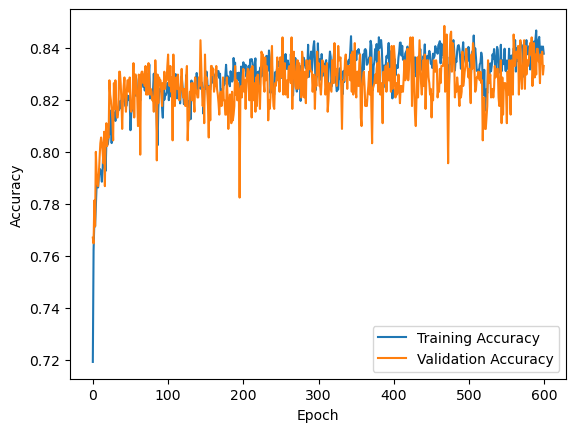

In [37]:
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let's try to make a bigger model with higher dropout, and see what happens

In [40]:
model4 = Sequential([
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(0.01),
    metrics = ['accuracy']
)

# Train the model
history4 = model4.fit(X_train,
                    y_train,
                    epochs=600,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/600
228/228 [==============================] - 1s 1ms/step - loss: 0.6509 - accuracy: 0.6589 - val_loss: 0.5433 - val_accuracy: 0.7484
Epoch 2/600
228/228 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.6839 - val_loss: 0.5695 - val_accuracy: 0.7176
Epoch 3/600
228/228 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.7097 - val_loss: 0.5582 - val_accuracy: 0.7308
Epoch 4/600
228/228 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.7129 - val_loss: 0.5168 - val_accuracy: 0.7527
Epoch 5/600
228/228 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.6982 - val_loss: 0.5602 - val_accuracy: 0.7473
Epoch 6/600
228/228 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6994 - val_loss: 0.5965 - val_accuracy: 0.7220
Epoch 7/600
228/228 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.6880 - val_loss: 0.5226 - val_accuracy: 0.7011

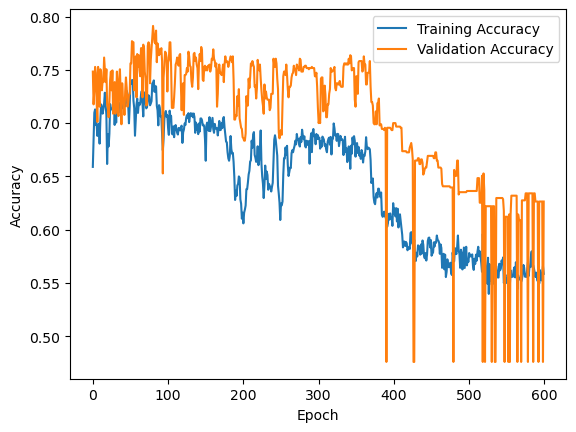

In [41]:
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

well this overfitting really bad. let's make the model smaller again with higher dropout

In [42]:
model5 = Sequential([
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(0.01),
    metrics = ['accuracy']
)

# Train the model
history5 = model5.fit(X_train,
                    y_train,
                    epochs=600,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/600
228/228 [==============================] - 0s 938us/step - loss: 0.6175 - accuracy: 0.6993 - val_loss: 0.5450 - val_accuracy: 0.7341
Epoch 2/600
228/228 [==============================] - 0s 784us/step - loss: 0.5706 - accuracy: 0.7196 - val_loss: 0.4879 - val_accuracy: 0.7736
Epoch 3/600
228/228 [==============================] - 0s 809us/step - loss: 0.5262 - accuracy: 0.7502 - val_loss: 0.4824 - val_accuracy: 0.7703
Epoch 4/600
228/228 [==============================] - 0s 860us/step - loss: 0.5194 - accuracy: 0.7443 - val_loss: 0.4788 - val_accuracy: 0.7626
Epoch 5/600
228/228 [==============================] - 0s 705us/step - loss: 0.5247 - accuracy: 0.7535 - val_loss: 0.4779 - val_accuracy: 0.7637
Epoch 6/600
228/228 [==============================] - 0s 705us/step - loss: 0.5156 - accuracy: 0.7568 - val_loss: 0.4691 - val_accuracy: 0.7725
Epoch 7/600
228/228 [==============================] - 0s 706us/step - loss: 0.5048 - accuracy: 0.7531 - val_loss: 0.4624 - val_ac

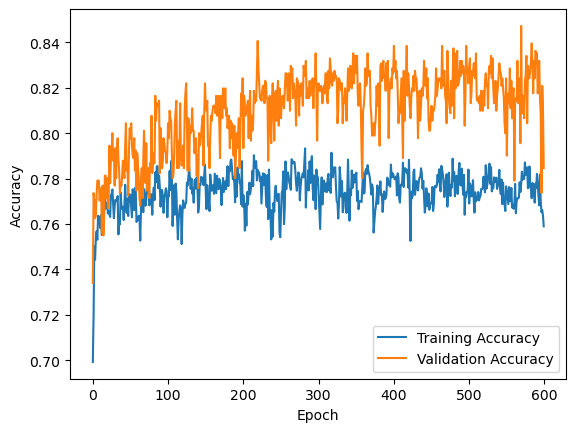

In [43]:
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Looks like so far the most accurate model is model3. Let's try to recreate the model and train with more epochs

In [44]:
model6 = Sequential([
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(0.01),
    metrics = ['accuracy']
)

# Train the model
history6 = model6.fit(X_train,
                    y_train,
                    epochs=1200,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/1200
228/228 [==============================] - 0s 913us/step - loss: 0.5496 - accuracy: 0.7289 - val_loss: 0.4875 - val_accuracy: 0.7560
Epoch 2/1200
228/228 [==============================] - 0s 696us/step - loss: 0.4896 - accuracy: 0.7605 - val_loss: 0.4882 - val_accuracy: 0.7429
Epoch 3/1200
228/228 [==============================] - 0s 781us/step - loss: 0.4747 - accuracy: 0.7729 - val_loss: 0.4788 - val_accuracy: 0.7857
Epoch 4/1200
228/228 [==============================] - 0s 981us/step - loss: 0.4682 - accuracy: 0.7779 - val_loss: 0.4470 - val_accuracy: 0.8000
Epoch 5/1200
228/228 [==============================] - 0s 708us/step - loss: 0.4513 - accuracy: 0.7847 - val_loss: 0.4453 - val_accuracy: 0.7857
Epoch 6/1200
228/228 [==============================] - 0s 672us/step - loss: 0.4589 - accuracy: 0.7836 - val_loss: 0.4819 - val_accuracy: 0.7890
Epoch 7/1200
228/228 [==============================] - 0s 664us/step - loss: 0.4554 - accuracy: 0.7825 - val_loss: 0.4646 -

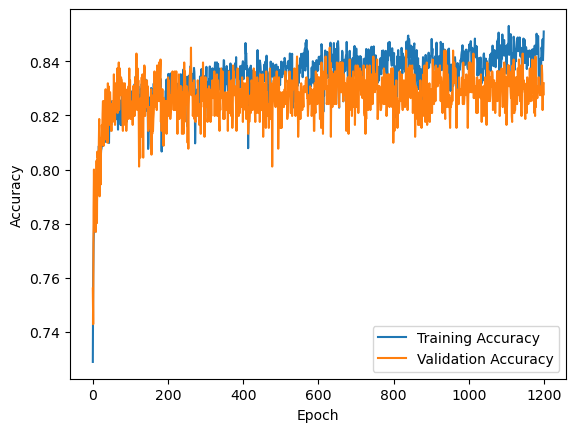

In [45]:
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

well, it looks like more epochs didn't really help. But I will say this is pretty good for our purposes. 

In [46]:
y_pred = model6(X_train)

In [53]:
import numpy as np

np.array(y_pred)

array([[8.0405143e-06],
       [0.0000000e+00],
       [1.4014796e-02],
       ...,
       [1.9970714e-01],
       [3.8536355e-01],
       [7.6648313e-01]], dtype=float32)

In [55]:
np.array(y_train)

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
from sklearn.metrics import precision_score, recall_score

def prec(y_true, preds, threshold):
    return precision_score(np.array(y_true), np.array(preds) > threshold)
def rec(y_true, preds, threshold):
    return recall_score(np.array(y_true), np.array(preds) > threshold)

In [60]:
prec(y_train, y_pred, 0.3)

0.7878174870757474

In [63]:
rec(y_train, y_pred, 0.3)

0.9605371334612223